In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import joblib


In [21]:
stocks = ['AAPL', 'GME', 'MCD', 'MSFT', 'NFLX', 'NVDA', 'TSLA']

In [22]:
dataframes=[pd.read_pickle(os.path.join('all_avg',f'{stock}_avg.pkl')) for stock in stocks]

In [23]:
feature_cols = [
    'LogReturn_Close', 'LogReturn_Volume', 
    'average_pos', 'average_neg', 'average_neu',
]

In [24]:
for i,df in enumerate(dataframes):
    df.fillna(0.333333, inplace=True)
    df['LogReturn_Close'] = np.log(df['Close'] / df['Close'].shift(1))
    df['LogReturn_Volume'] = np.log(df['Volume'] / df['Volume'].shift(1))
    df=df.dropna()
    df= df.drop(columns=['Close','Volume','Open','High','Low'])
    df.insert(0, 'Stock', f"Stock_{i}")
    dataframes[i]=df

In [25]:
dataframes[0]

,Stock,Date,average_pos,average_neg,average_neu,LogReturn_Close,LogReturn_Volume
1,Stock_0,2018-01-03,0.071818,0.007000,0.921273,-0.000174,0.144129
2,Stock_0,2018-01-04,0.144250,0.049125,0.806625,0.004634,-0.274392
3,Stock_0,2018-01-05,0.059385,0.043308,0.897154,0.011321,0.053181
4,Stock_0,2018-01-08,0.105111,0.055111,0.839778,-0.003721,-0.140059
5,Stock_0,2018-01-09,0.092467,0.059467,0.848067,-0.000115,0.048226
...,...,...,...,...,...,...,...
1254,Stock_0,2022-12-23,0.090567,0.037967,0.871533,-0.002802,-0.198824
1255,Stock_0,2022-12-27,0.115478,0.033000,0.851522,-0.013975,0.078233
1256,Stock_0,2022-12-28,0.052068,0.036750,0.911364,-0.031166,0.213576
1257,Stock_0,2022-12-29,0.081450,0.045175,0.873450,0.027931,-0.120969


In [26]:
combined_df = pd.concat(dataframes,ignore_index=True)
combined_df

,Stock,Date,average_pos,average_neg,average_neu,LogReturn_Close,LogReturn_Volume
0,Stock_0,2018-01-03,0.071818,0.007000,0.921273,-0.000174,0.144129
1,Stock_0,2018-01-04,0.144250,0.049125,0.806625,0.004634,-0.274392
2,Stock_0,2018-01-05,0.059385,0.043308,0.897154,0.011321,0.053181
3,Stock_0,2018-01-08,0.105111,0.055111,0.839778,-0.003721,-0.140059
4,Stock_0,2018-01-09,0.092467,0.059467,0.848067,-0.000115,0.048226
...,...,...,...,...,...,...,...
8801,Stock_6,2022-12-23,0.075421,0.047952,0.876619,-0.017707,-0.229605
8802,Stock_6,2022-12-27,0.070500,0.058558,0.870955,-0.121138,0.222694
8803,Stock_6,2022-12-28,0.078370,0.052331,0.869370,0.032553,0.057855
8804,Stock_6,2022-12-29,0.068304,0.043288,0.888368,0.077726,0.003850


In [27]:
scaler=StandardScaler()

In [28]:
combined_df[feature_cols] = scaler.fit_transform(combined_df[feature_cols])
combined_df

,Stock,Date,average_pos,average_neg,average_neu,LogReturn_Close,LogReturn_Volume
0,Stock_0,2018-01-03,-0.408661,-0.779809,0.676714,-0.025315,0.401321
1,Stock_0,2018-01-04,0.891700,-0.015692,-0.501615,0.092928,-0.762073
2,Stock_0,2018-01-05,-0.631880,-0.121213,0.428824,0.257369,0.148509
3,Stock_0,2018-01-08,0.189043,0.092892,-0.160877,-0.112537,-0.388656
4,Stock_0,2018-01-09,-0.037961,0.171899,-0.075685,-0.023857,0.134732
...,...,...,...,...,...,...,...
8801,Stock_6,2022-12-23,-0.343987,-0.036962,0.217771,-0.456465,-0.637574
8802,Stock_6,2022-12-27,-0.432326,0.155411,0.159559,-2.999997,0.619716
8803,Stock_6,2022-12-28,-0.291034,0.042472,0.143269,0.779500,0.161500
8804,Stock_6,2022-12-29,-0.471751,-0.121571,0.338525,1.890373,0.011379


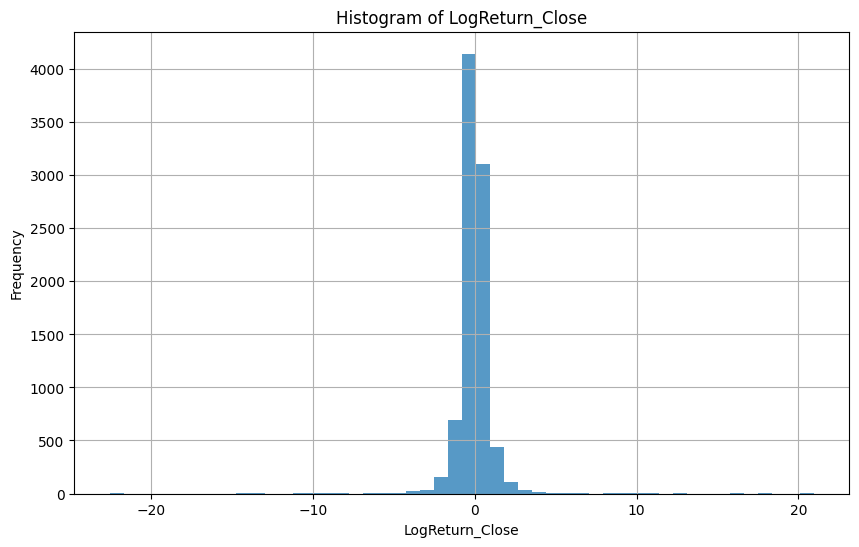

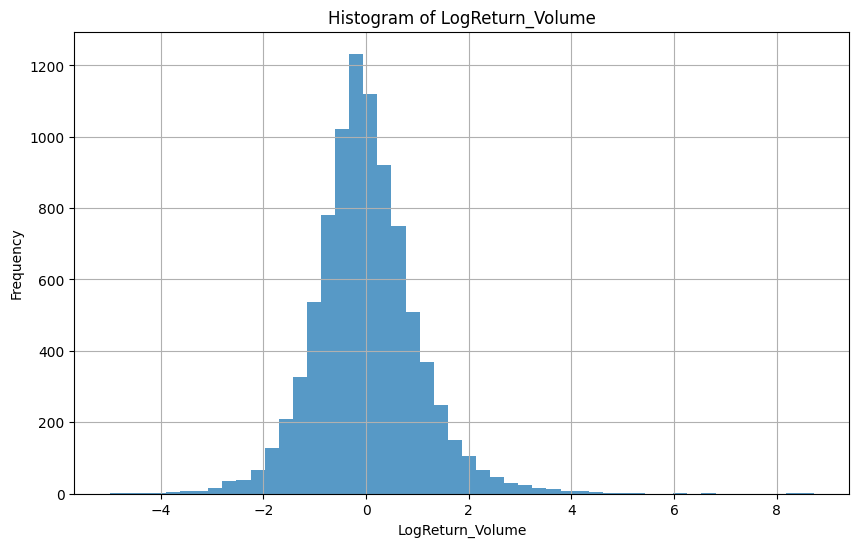

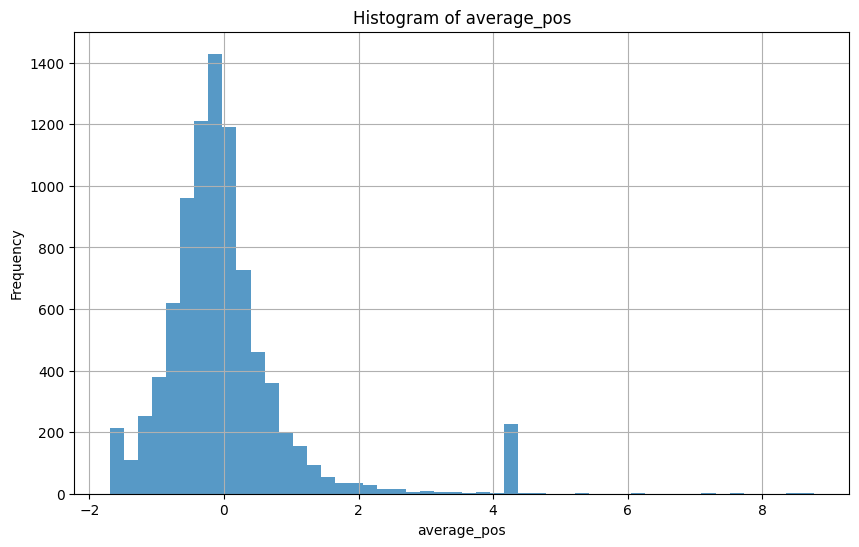

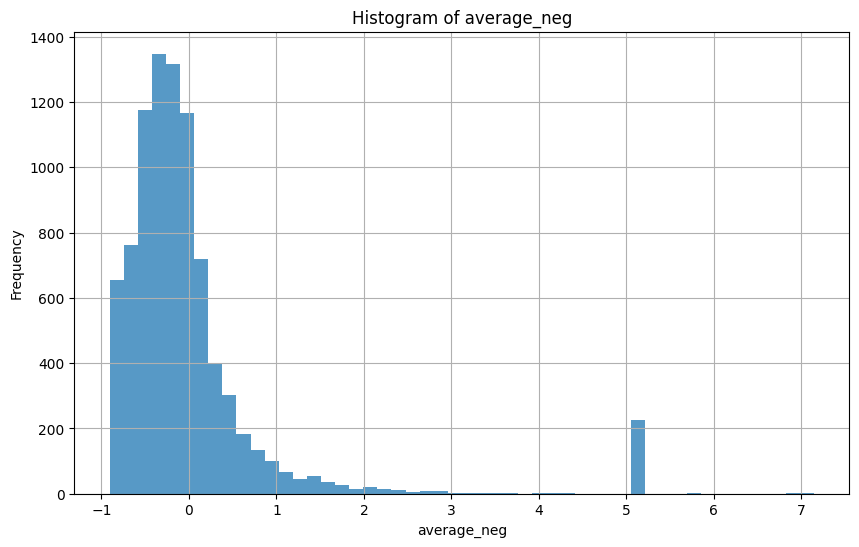

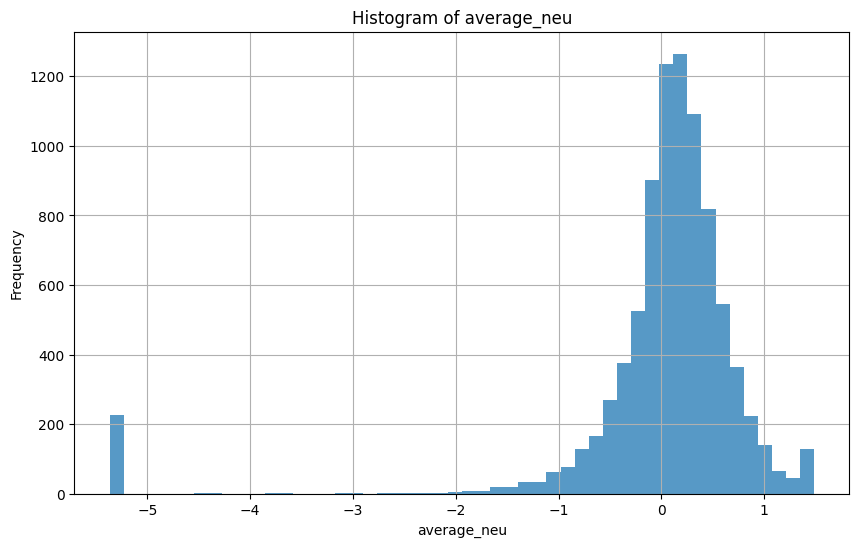

In [29]:
for col in feature_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(combined_df[col], bins=50, alpha=0.75)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [14]:
sequence_length = 20
X, y, stock_labels = [], [], []

In [15]:
for stock, group in combined_df.groupby('Stock'):
    group = group.sort_values(by='Date').reset_index(drop=True)
    
    # Ensure we have enough data for at least one sequence
    if len(group) > sequence_length + 1:
        for i in range(len(group) - sequence_length ):
            # Prepare input features
            input_sequence = group[feature_cols].iloc[i:i + sequence_length].values
            X.append(input_sequence)
            
            # Use the pre-computed log return of the day after the sequence
            target = group['LogReturn_Close'].iloc[i + sequence_length]
            y.append(target)
            
            # Track the stock label for each sequence
            stock_labels.append(stock)

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}, Number of sequences: {len(stock_labels)}")

Shape of X: (8666, 20, 5), Shape of y: (8666,), Number of sequences: 8666


In [18]:
np.save(os.path.join('all_avg', 'avg_X.npy'), X)
np.save(os.path.join('all_avg', 'avg_y.npy'), y)

In [19]:
joblib.dump(scaler, os.path.join('all_avg', 'avg_scaler.joblib'))

['all_avg/avg_scaler.joblib']